In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
data = gpd.read_file('data/TOC 10 15 2021 SP4 TOC DIST.csv')
geojson = gpd.read_file('data/TOC Geocode Shapefile 10 21 2021.json')

In [3]:
toc = geojson.merge(data,on='AIN')

In [4]:
from geopandas import GeoDataFrame
tocgdf = GeoDataFrame(toc)
type(tocgdf)

geopandas.geodataframe.GeoDataFrame

In [5]:
tocgdf = tocgdf.rename(columns={'geometry_x': 'geometry'})

In [6]:
toc_web_mercator = tocgdf.to_crs(epsg=3857)

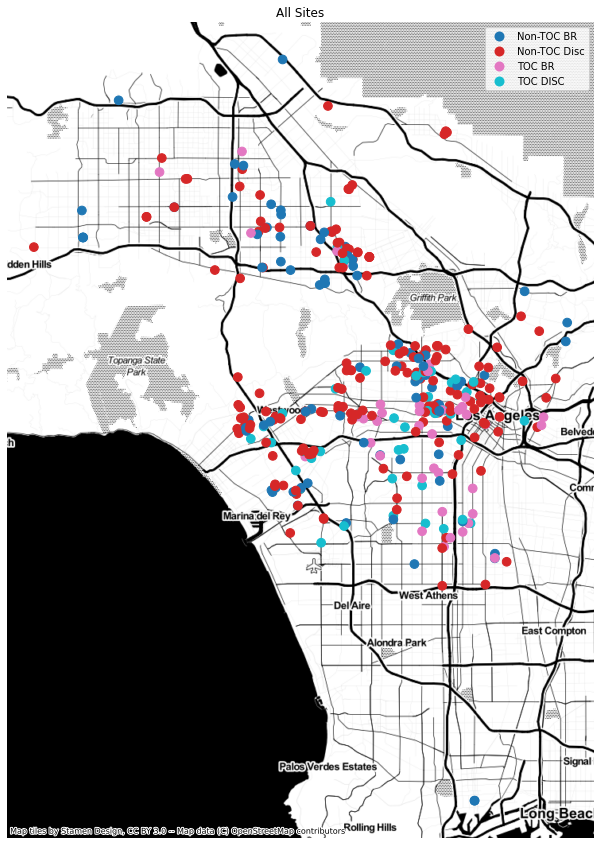

In [7]:
fig, ax = plt.subplots(figsize=(30, 15))
toc_web_mercator.plot(ax=ax,
                      column = 'TOC Status',
                      categorical = True,
                      legend = True,
                      markersize=75)

ax.axis('off')
ax.set_title('All Sites')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)

(-13205158.202511357,
 -13153799.220137483,
 3995146.526416354,
 4073594.7371256393)

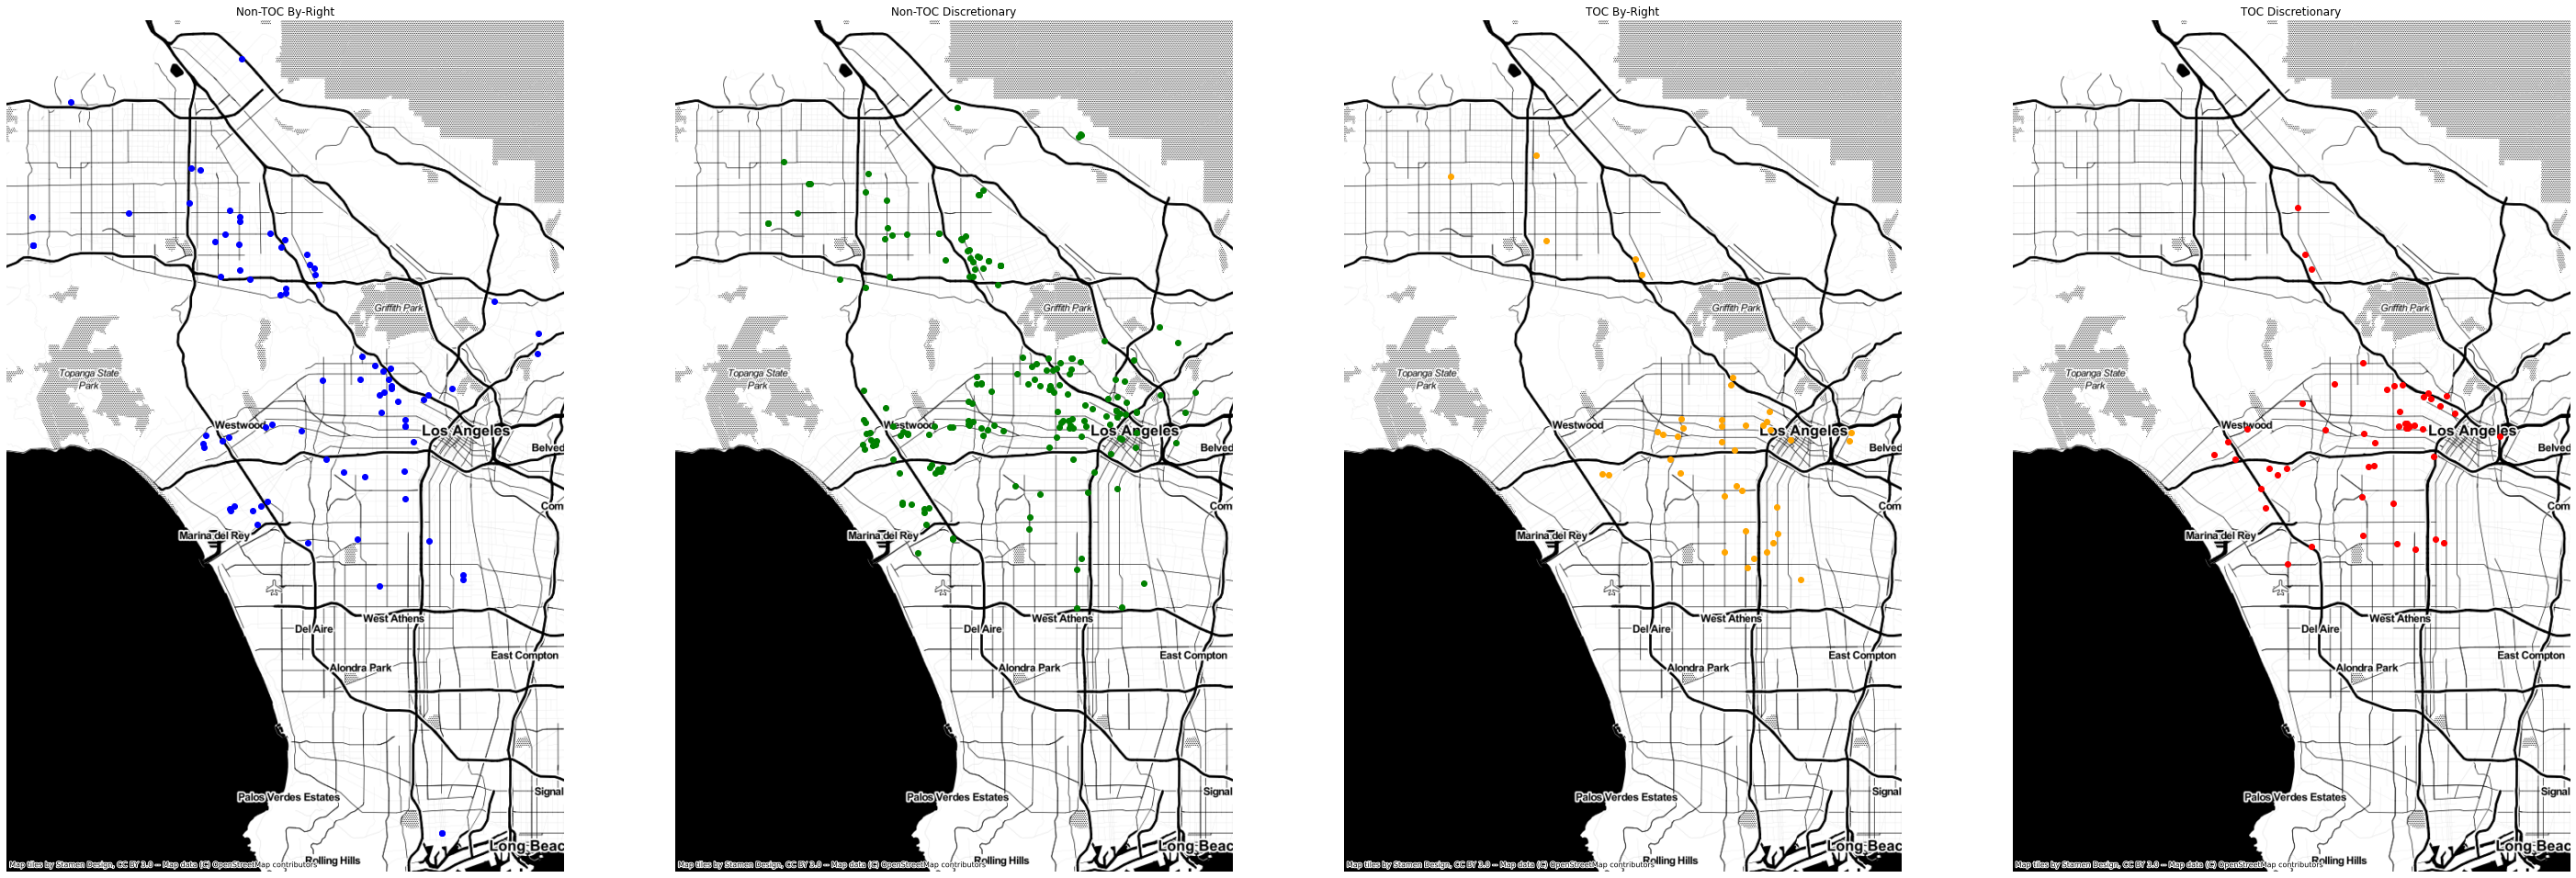

In [9]:
fix, axs = plt.subplots(1,4,sharex=True, sharey=True,figsize=(50,30))
ax1, ax2, ax3, ax4 = axs
toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC BR'].plot(ax=ax1,color="blue")
ax1.set_title("Non-TOC By-Right")
ctx.add_basemap(ax1, source=ctx.providers.Stamen.Toner)
ax1.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC Disc'].plot(ax=ax2,color="green")
ax2.set_title("Non-TOC Discretionary")
ctx.add_basemap(ax2, source=ctx.providers.Stamen.Toner)
ax2.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC BR'].plot(ax=ax3,color="orange")
ax3.set_title("TOC By-Right")
ctx.add_basemap(ax3, source=ctx.providers.Stamen.Toner)
ax3.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC DISC'].plot(ax=ax4,color="red")
ax4.set_title("TOC Discretionary")
ctx.add_basemap(ax4, source=ctx.providers.Stamen.Toner)
ax4.axis("off")
